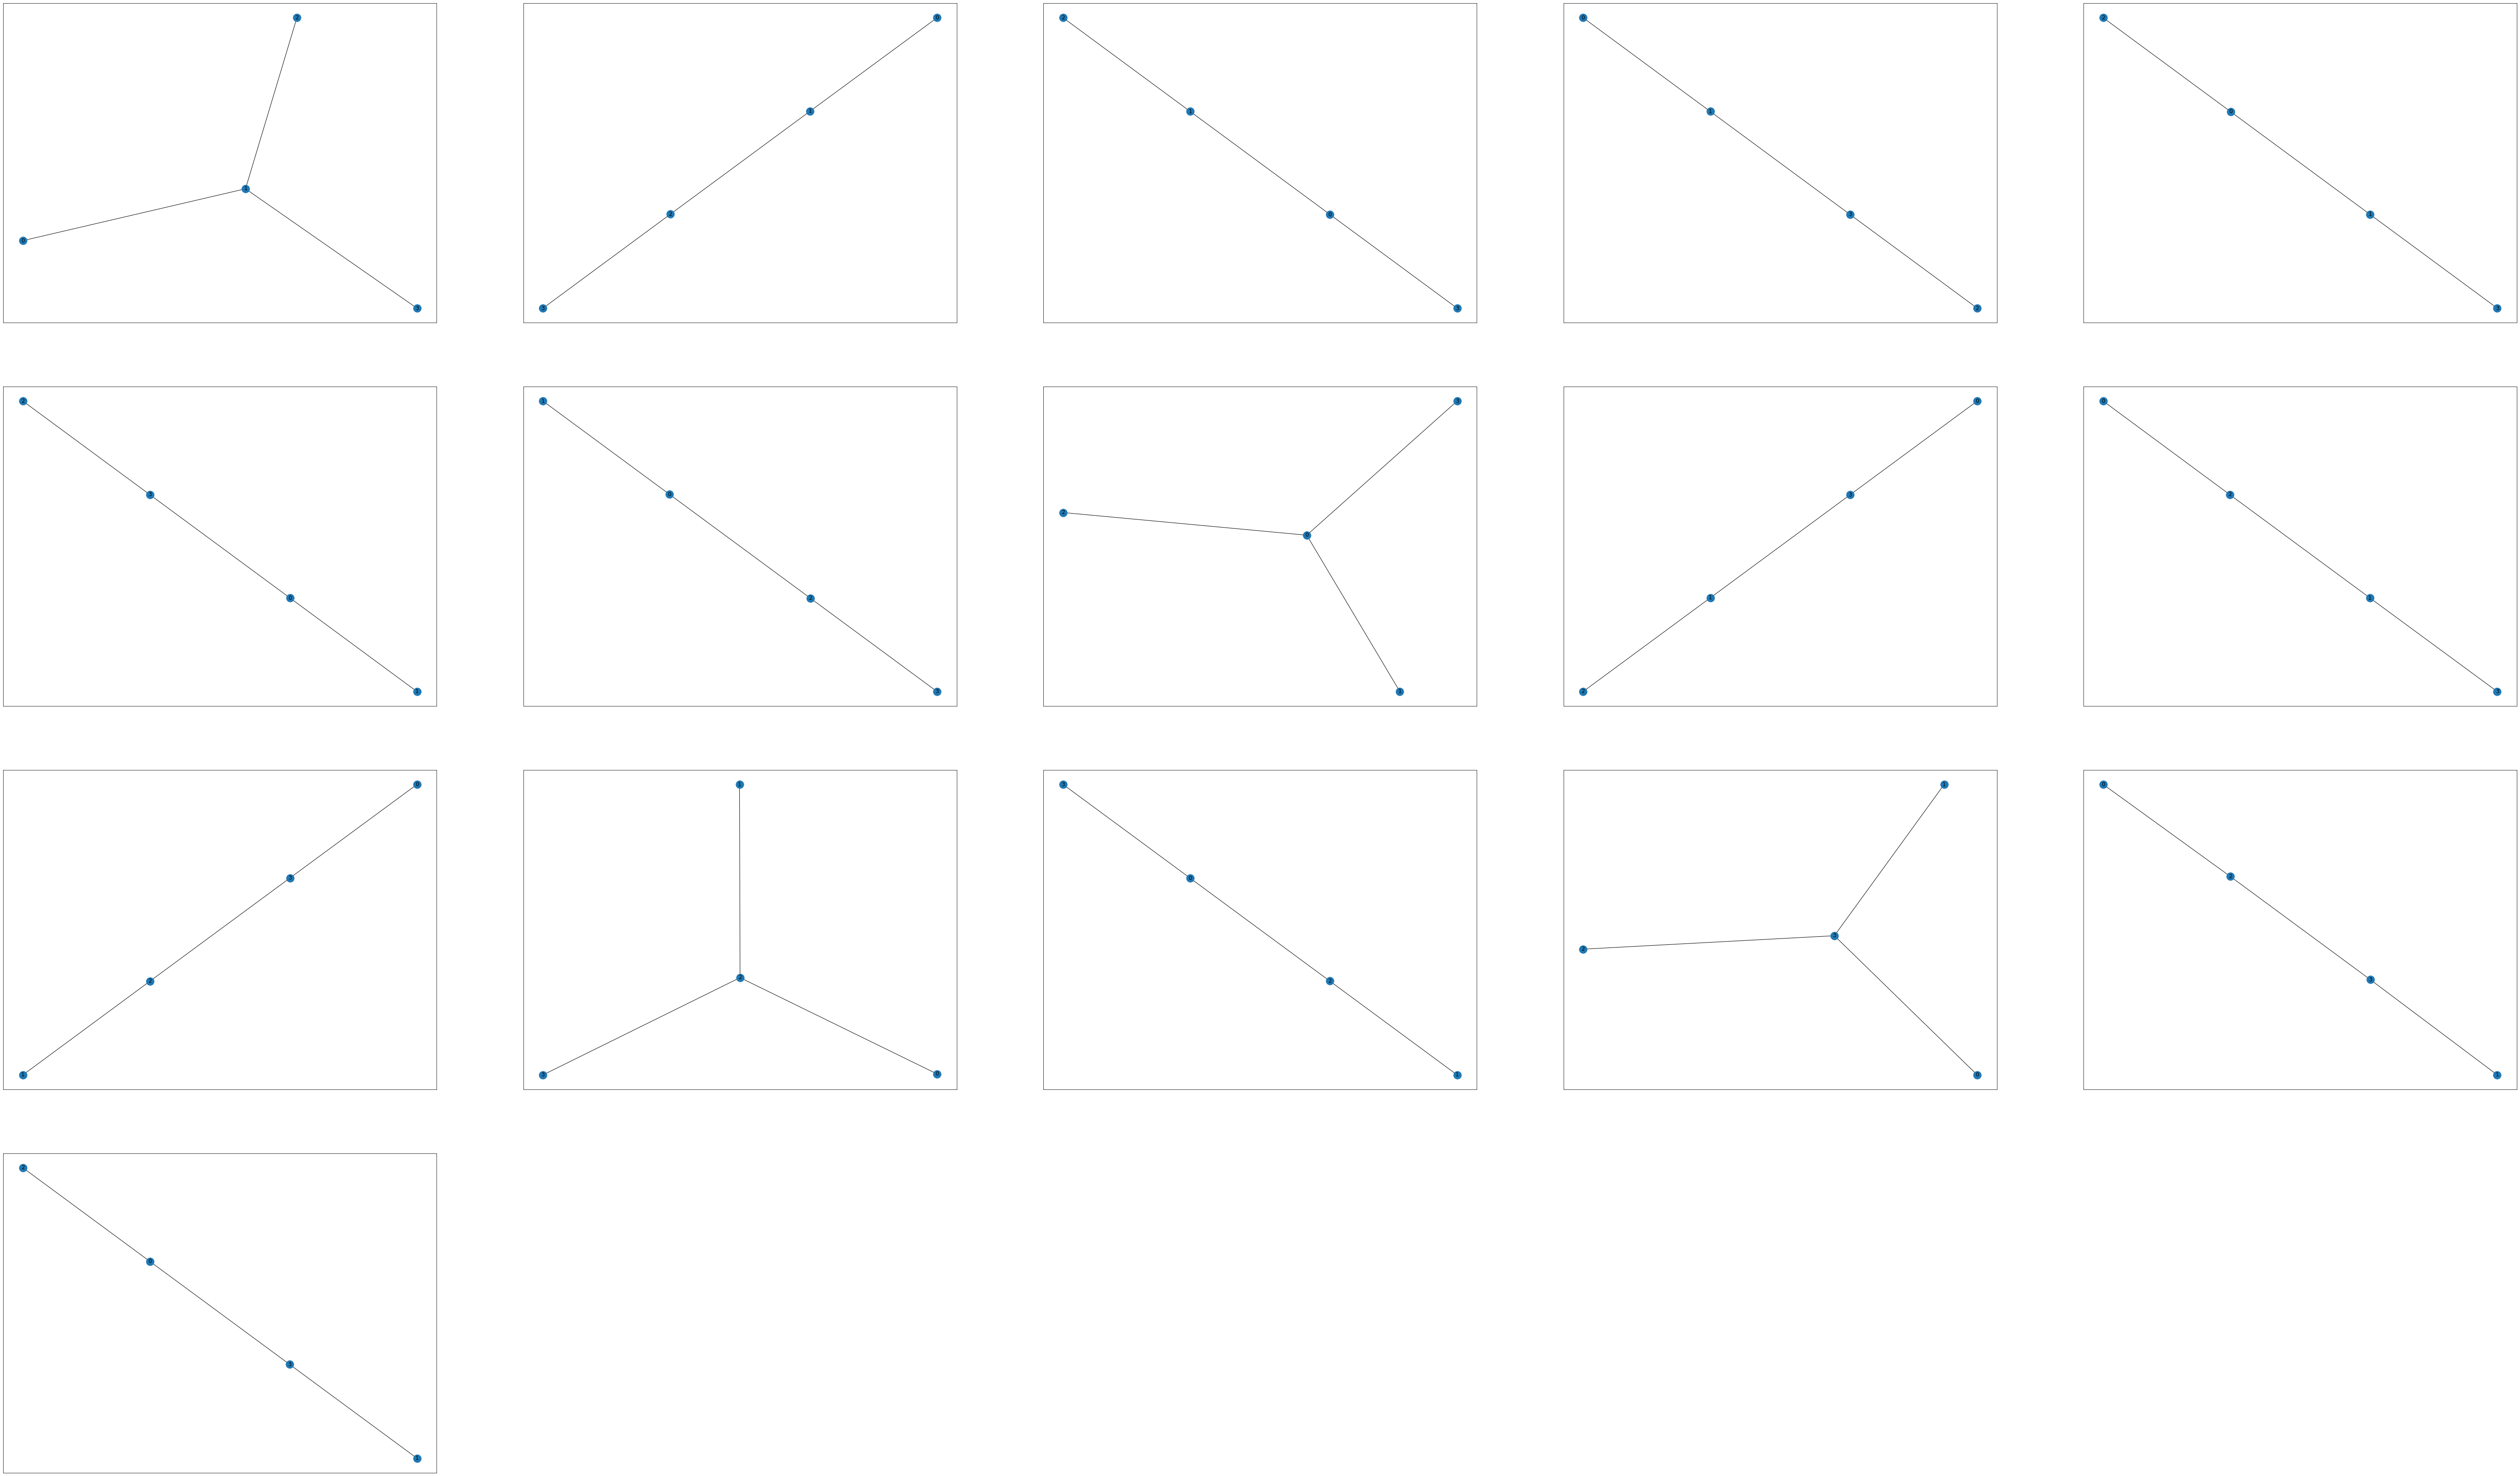

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

def get_trees(nodes):
    # generate all pairwise combinations of nodes
    edges =  [a for a in itertools.product(range(nodes), range(nodes))]

    # use sets to lose..
    # ..symmetric edges: (0,1), (1,0) => keep only (0,1) 
    edges = list(set([tuple(set(e)) for e in edges]))
    # ..and self-loops: (0,0)
    edges = [e for e in edges if len(e)>1]

    trees = []
    # generate all graphs that have nodes-1 edges
    for o in itertools.combinations(edges, nodes-1):
        #make sure that all nodes are in the edgelist:
        flattened = [item for sublist in o for item in sublist]


        
        if len(set(flattened)) == nodes:
            G = nx.Graph()
            G.add_edges_from(o)
            
            
            nei_larger_2 = [1 if len(nei) > 3 else 0 for node, nei in G.adjacency()] 
            if sum(nei_larger_2): continue
                
            # make sure all nodes are connected
            if len(list(nx.connected_components(G)))==1:
                trees.append(G)

    return trees

n = 4
all_trees = get_trees(n)
sqrt_len = int(len(all_trees)**(1/2))

plt.figure(figsize=(100,60))

for p, tree in enumerate(all_trees):
    plt.subplot(sqrt_len, sqrt_len+1,p+1)
    nx.draw_networkx(tree)
plt.show()

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

def get_trees(nodes):
    # generate all pairwise combinations of nodes
    edges =  [a for a in itertools.product(range(nodes), range(nodes))]

    # use sets to lose..
    # ..symmetric edges: (0,1), (1,0) => keep only (0,1) 
    edges = list(set([tuple(set(e)) for e in edges]))
    # ..and self-loops: (0,0)
    edges = [e for e in edges if len(e)>1]

    trees = []
    # generate all graphs that have nodes-1 edges
    for o in itertools.combinations(edges, nodes-1):
        #make sure that all nodes are in the edgelist:
        print(o)
        flattened = [item for sublist in o for item in sublist]
        print(flattened)
        print(len(set(flattened)), nodes)
        
        if len(set(flattened)) == nodes:
            G = nx.Graph()
            G.add_edges_from(o)
            
            flag = False
            for node, nei in G.adjacency(): 
                if len(nei) > 3: flag = True;break#
            if flag: continue
                    
            # make sure all nodes are connected
            if len(list(nx.connected_components(G)))==1:
                trees.append(G)

    return trees

n = 4
all_trees = get_trees(n)

((0, 1), (1, 2), (1, 3))
[0, 1, 1, 2, 1, 3]
4 4
((0, 1), (1, 2), (2, 3))
[0, 1, 1, 2, 2, 3]
4 4
((0, 1), (1, 2), (0, 3))
[0, 1, 1, 2, 0, 3]
4 4
((0, 1), (1, 2), (0, 2))
[0, 1, 1, 2, 0, 2]
3 4
((0, 1), (1, 3), (2, 3))
[0, 1, 1, 3, 2, 3]
4 4
((0, 1), (1, 3), (0, 3))
[0, 1, 1, 3, 0, 3]
3 4
((0, 1), (1, 3), (0, 2))
[0, 1, 1, 3, 0, 2]
4 4
((0, 1), (2, 3), (0, 3))
[0, 1, 2, 3, 0, 3]
4 4
((0, 1), (2, 3), (0, 2))
[0, 1, 2, 3, 0, 2]
4 4
((0, 1), (0, 3), (0, 2))
[0, 1, 0, 3, 0, 2]
4 4
((1, 2), (1, 3), (2, 3))
[1, 2, 1, 3, 2, 3]
3 4
((1, 2), (1, 3), (0, 3))
[1, 2, 1, 3, 0, 3]
4 4
((1, 2), (1, 3), (0, 2))
[1, 2, 1, 3, 0, 2]
4 4
((1, 2), (2, 3), (0, 3))
[1, 2, 2, 3, 0, 3]
4 4
((1, 2), (2, 3), (0, 2))
[1, 2, 2, 3, 0, 2]
4 4
((1, 2), (0, 3), (0, 2))
[1, 2, 0, 3, 0, 2]
4 4
((1, 3), (2, 3), (0, 3))
[1, 3, 2, 3, 0, 3]
4 4
((1, 3), (2, 3), (0, 2))
[1, 3, 2, 3, 0, 2]
4 4
((1, 3), (0, 3), (0, 2))
[1, 3, 0, 3, 0, 2]
4 4
((2, 3), (0, 3), (0, 2))
[2, 3, 0, 3, 0, 2]
3 4


In [2]:
with open("gen_mol_count_test_nei_enclosed(no_bridge).txt") as f:
    testing = f.readlines()

/storage/fong/.local/lib/python3.6/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


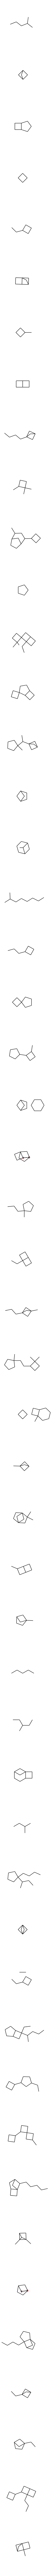

In [3]:
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS
# testing = ['Cc1ccc2nc(-c3cccnc3)cc(C(=O)NCC[NH+]3CCN(c4ccccc4F)CC3)c2c1', '[CH3:2][CH3:2]', 'c1c[c:2]([C:2]2=[CH:12][CH2:12][CH2:12][N:12]=[CH:12]2)ccn1']
# testing = [
# 'Cc1ccc([C@H](C)NC(=O)[C@@H]2CC(=O)N(CCN3CCOCC3)C2)o1',
# '[CH3:2][CH3:2]',
# '[c:2]1([CH3:15])[cH:12][cH:12][cH:12][o:12]1',
# '[c:2]1([CH3:15])[cH:12][o:12][cH:12][cH:12]1',
# '[c:0]1([CH3:5])[cH:1][o:2][cH:3][cH:4]1',
# ]
testing = [Chem.MolFromSmiles(s) for s in testing]
img = Draw.MolsToGridImage(testing, molsPerRow=1, subImgSize=(300, 300))
img